In [1]:
%%capture

%cd ..
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from heatmap import heatmap, corrplot
import itertools

sns.set()

pd.set_option('expand_frame_repr', True)
pd.set_option('display.column_space', 6)
pd.set_option('display.max_colwidth', 20)
pd.set_option('display.max_columns', None)
pd.set_option('display.show_dimensions', True)

# Exploratory Data Analysis

This notebook can be used to reproduce the exploratory data analysis. First let's load the data and do some initial setup.

* TODO: FAZER A ANALISE REAL AQUI
* Adicionar Widgets ou Plotar manualmente cada caso e descorrer

## Setup

In [15]:
PROCESSED_DATA_FOLDER = Path('data/processed/')

FIGURES_PATH = Path("reports/figures/eda")
FIGURES_PATH.mkdir(exist_ok=True, parents=True)

SAVE_FIGURES = True

## Data Loading

In [12]:
data_df = pd.read_csv(PROCESSED_DATA_FOLDER/"fake_true_news_cleaned_features.csv", index_col=0)
data_df["class"] = data_df["class"].astype('category')

## Relevant Info

In [16]:
CONTINUOUS_VARIABLES = [x for x, y in data_df.dtypes.iteritems() if str(y) not in ('category', 'object')]

## Correlation Analysis

First, let's analyze the correlation matrix.

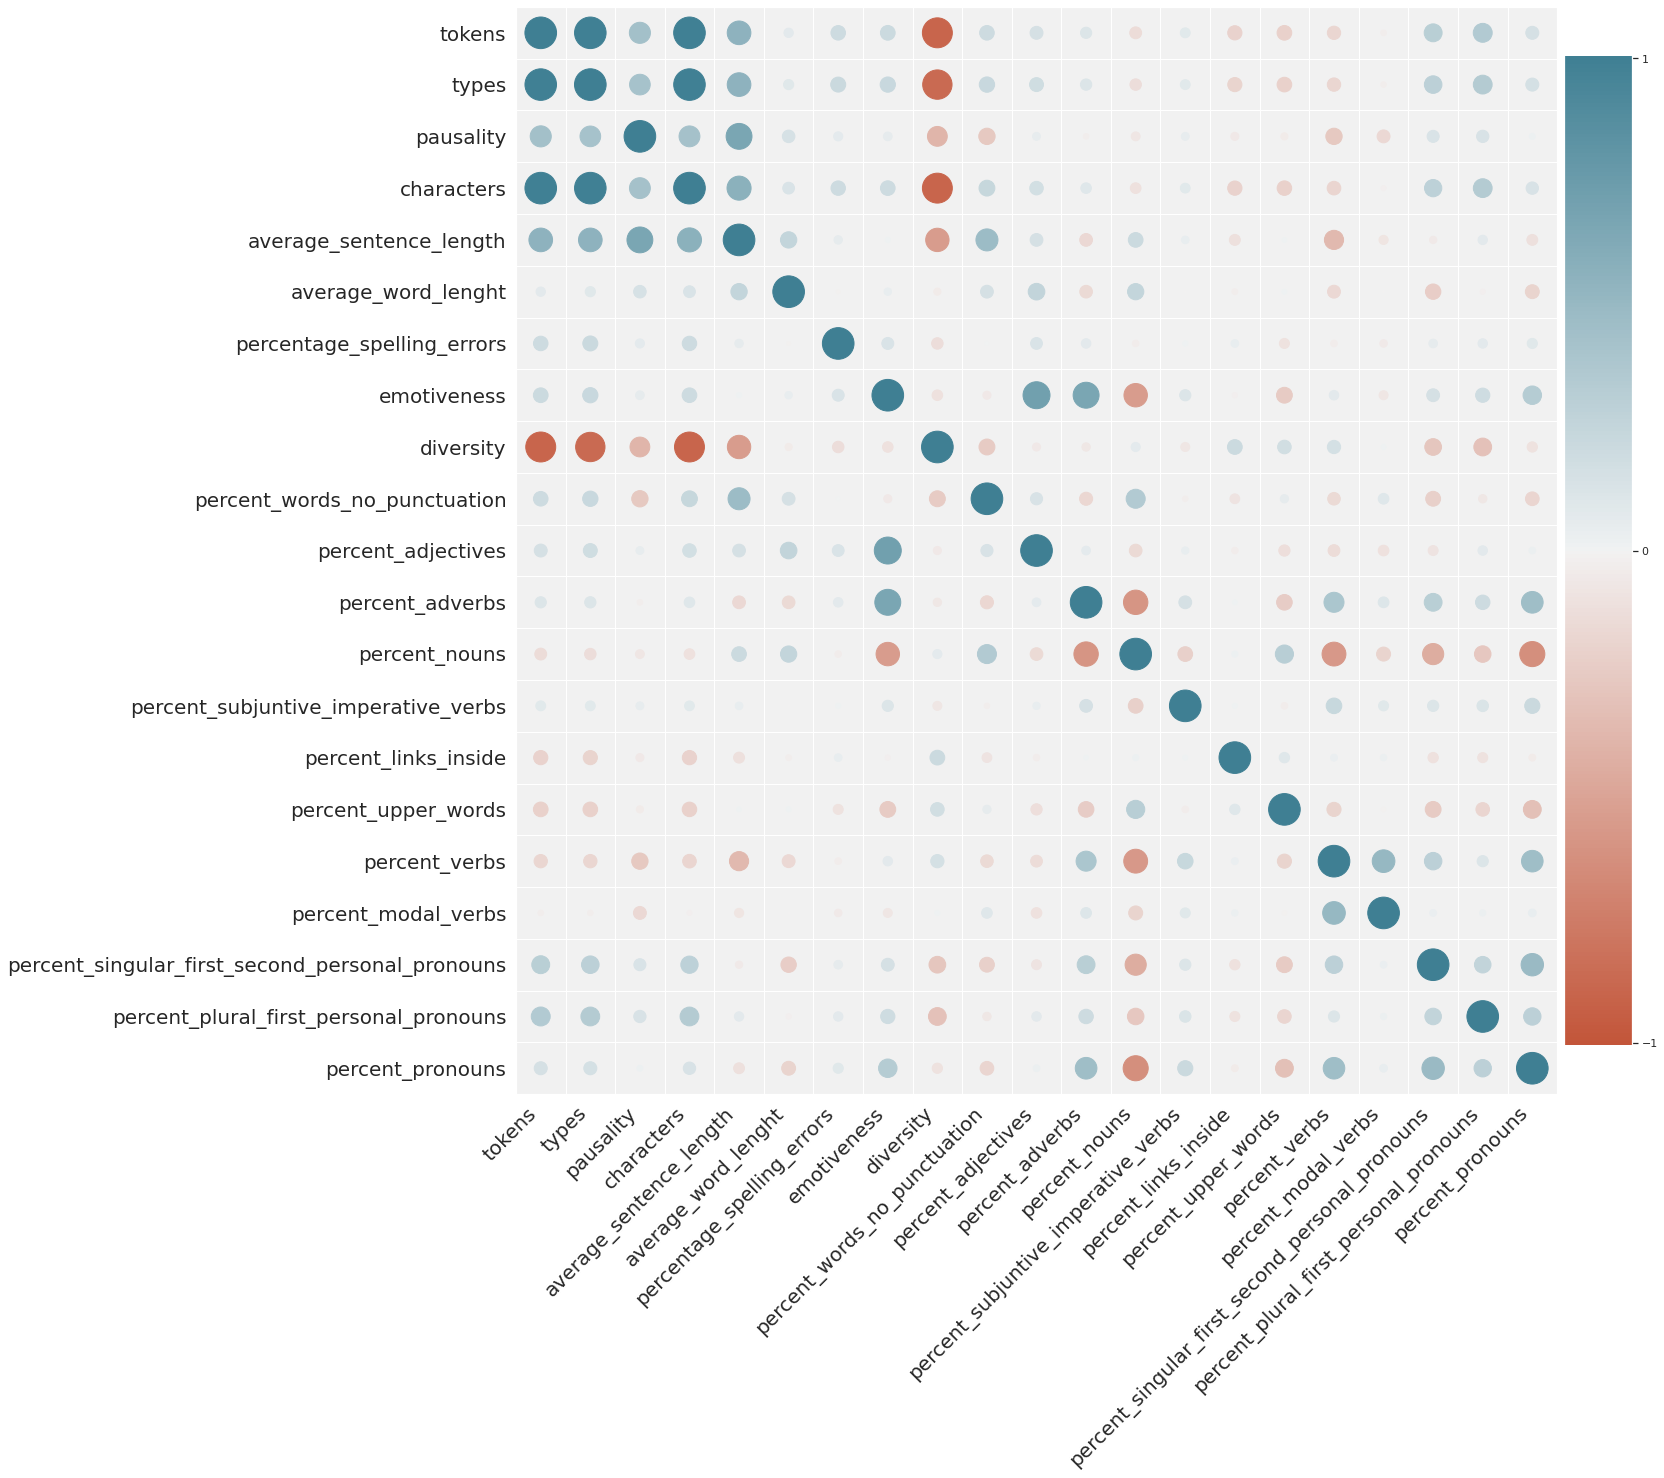

In [18]:
fig = plt.figure(figsize=(20, 20))
corrplot(data_df[CONTINUOUS_VARIABLES].corr(method="spearman"), size_scale=1000, marker='o')
fig.axes[0].tick_params(axis="x", labelsize=20)
fig.axes[0].tick_params(axis="y", labelsize=20)
fig.axes[1].tick_params(axis="x", labelsize=20)
fig.axes[1].tick_params(axis="x", labelsize=20)

if SAVE_FIGURES:
    fig.savefig(FIGURES_PATH/'correlation_matrix.png', dpi=100)

To analyze the highest correlations, let's create some custon functions

In [108]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df):
    au_corr = df.corr().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr

def save_joint_plots(columns, data, path, **kwargs):
    path.mkdir(exist_ok=True, parents=True)
    for col1, col2 in columns:
        sns.jointplot(x=col1, y=col2, hue=kwargs['hue'], data=data)            
        plt.savefig(path/f'{col1}-{col2}.png')
        plt.close()    

Now, let's calculate the values and visualize these correlations. 
**OBS:** The visualization can be found on disk

In [27]:
corr_data = get_top_abs_correlations(data_df[CONTINUOUS_VARIABLES])

### Top Positive Correlations

In [116]:
correlations = corr_data[corr_data >= 0].sort_values(ascending=False)[0:10]
display(correlations)

if SAVE_FIGURES: 
    save_joint_plots(
        columns=correlations.index.values,
        data=data_df,
        path=FIGURES_PATH/'top-positive-corr',
        hue='class'
    )

tokens                                           characters                      0.997097
types                                            characters                      0.983191
tokens                                           types                           0.982716
emotiveness                                      percent_adjectives              0.731566
                                                 percent_adverbs                 0.685776
pausality                                        average_sentence_length         0.599446
percent_verbs                                    percent_modal_verbs             0.535333
percent_singular_first_second_personal_pronouns  percent_pronouns                0.517687
percent_verbs                                    percent_pronouns                0.453007
average_sentence_length                          percent_words_no_punctuation    0.447989
Length: 10, dtype: float64

### Lowest Positive Correlations

In [117]:
correlations = corr_data[corr_data >= 0].sort_values(ascending=True)[0:10]
display(correlations)

if SAVE_FIGURES: 
    save_joint_plots(
        columns=correlations.index.values,
        data=data_df,
        path=FIGURES_PATH/'low-positive-corr',
        hue='class'
    )

pausality                   percent_adjectives                        0.000075
                            percent_upper_words                       0.000631
percent_adjectives          percent_subjuntive_imperative_verbs       0.002266
pausality                   percent_plural_first_personal_pronouns    0.006242
percentage_spelling_errors  percent_verbs                             0.008329
percent_adverbs             percent_links_inside                      0.011523
average_word_lenght         percent_modal_verbs                       0.013514
percent_adjectives          percent_plural_first_personal_pronouns    0.013789
pausality                   emotiveness                               0.015940
percent_modal_verbs         percent_plural_first_personal_pronouns    0.016469
Length: 10, dtype: float64

/home/limagbz/.cache/pypoetry/virtualenvs/fake-news-ptbr-UmBBz2XV-py3.8/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


### Top Negative Correlations

In [118]:
correlations = corr_data[corr_data <= 0].sort_values(ascending=False)[0:10]
display(correlations)

if SAVE_FIGURES: 
    save_joint_plots(
        columns=correlations.index.values,
        data=data_df,
        path=FIGURES_PATH/'top-negative-corr',
        hue='class'
    )

percent_subjuntive_imperative_verbs  percent_upper_words                               -0.003038
percent_adjectives                   percent_pronouns                                  -0.005102
percentage_spelling_errors           percent_singular_first_second_personal_pronouns   -0.006933
                                     percent_plural_first_personal_pronouns            -0.007098
pausality                            percent_singular_first_second_personal_pronouns   -0.013999
average_word_lenght                  percent_links_inside                              -0.015539
                                     percentage_spelling_errors                        -0.020175
pausality                            percent_pronouns                                  -0.020605
average_word_lenght                  diversity                                         -0.022078
percentage_spelling_errors           percent_upper_words                               -0.022309
Length: 10, dtype: float64

/home/limagbz/.cache/pypoetry/virtualenvs/fake-news-ptbr-UmBBz2XV-py3.8/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


### Lowest Negative Correlations

In [119]:
correlations = corr_data[corr_data <= 0].sort_values(ascending=True)[0:10]
display(correlations)

if SAVE_FIGURES: 
    save_joint_plots(
        columns=correlations.index.values,
        data=data_df,
        path=FIGURES_PATH/'low-negative-corr',
        hue='class'
    )

tokens                   diversity                                         -0.695778
characters               diversity                                         -0.695489
types                    diversity                                         -0.694460
percent_nouns            percent_pronouns                                  -0.629431
percent_adverbs          percent_nouns                                     -0.585830
percent_nouns            percent_verbs                                     -0.559814
emotiveness              percent_nouns                                     -0.548097
average_sentence_length  diversity                                         -0.438852
percent_nouns            percent_singular_first_second_personal_pronouns   -0.419796
average_sentence_length  percent_verbs                                     -0.331216
Length: 10, dtype: float64

## Distributions

Now let's compare the distributions for both classes.

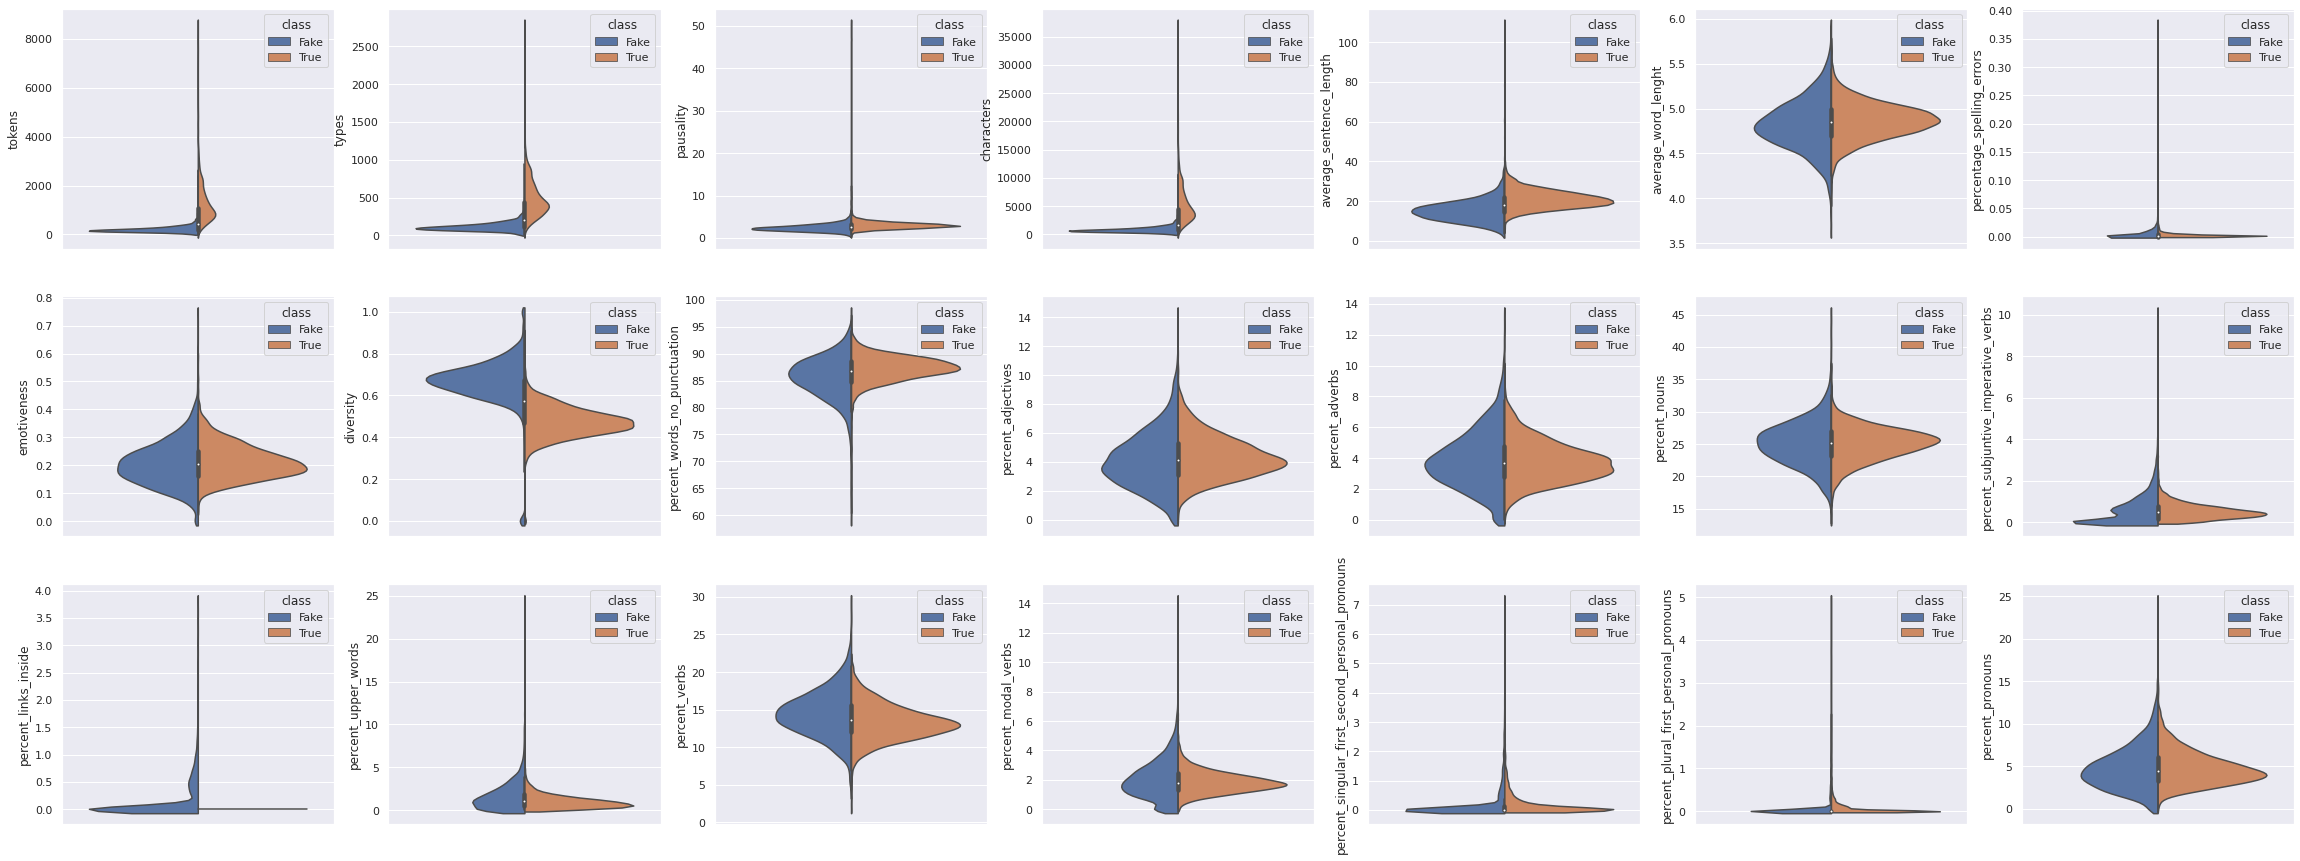

In [125]:
plot_data_df = data_df.copy()
plot_data_df["all"] = ""

fig, axes = plt.subplots(ncols=7, nrows=3, figsize=(40, 15), sharex=False, sharey=False)
for col, ax in zip(CONTINUOUS_VARIABLES, axes.flat):
    sns.violinplot(x="all", data=plot_data_df, y=col, hue='class', cut=True, split=True, ax=ax, vars=plot_data_df.columns)
    sns.stripplot(x="all", data=plot_data_df, y=col, hue='class', alpha=.1, ax=ax)
    ax.set_xlabel("")
    
if SAVE_FIGURES:
    plt.savefig(FIGURES_PATH/'all_violin_plots.png')

plt.show()

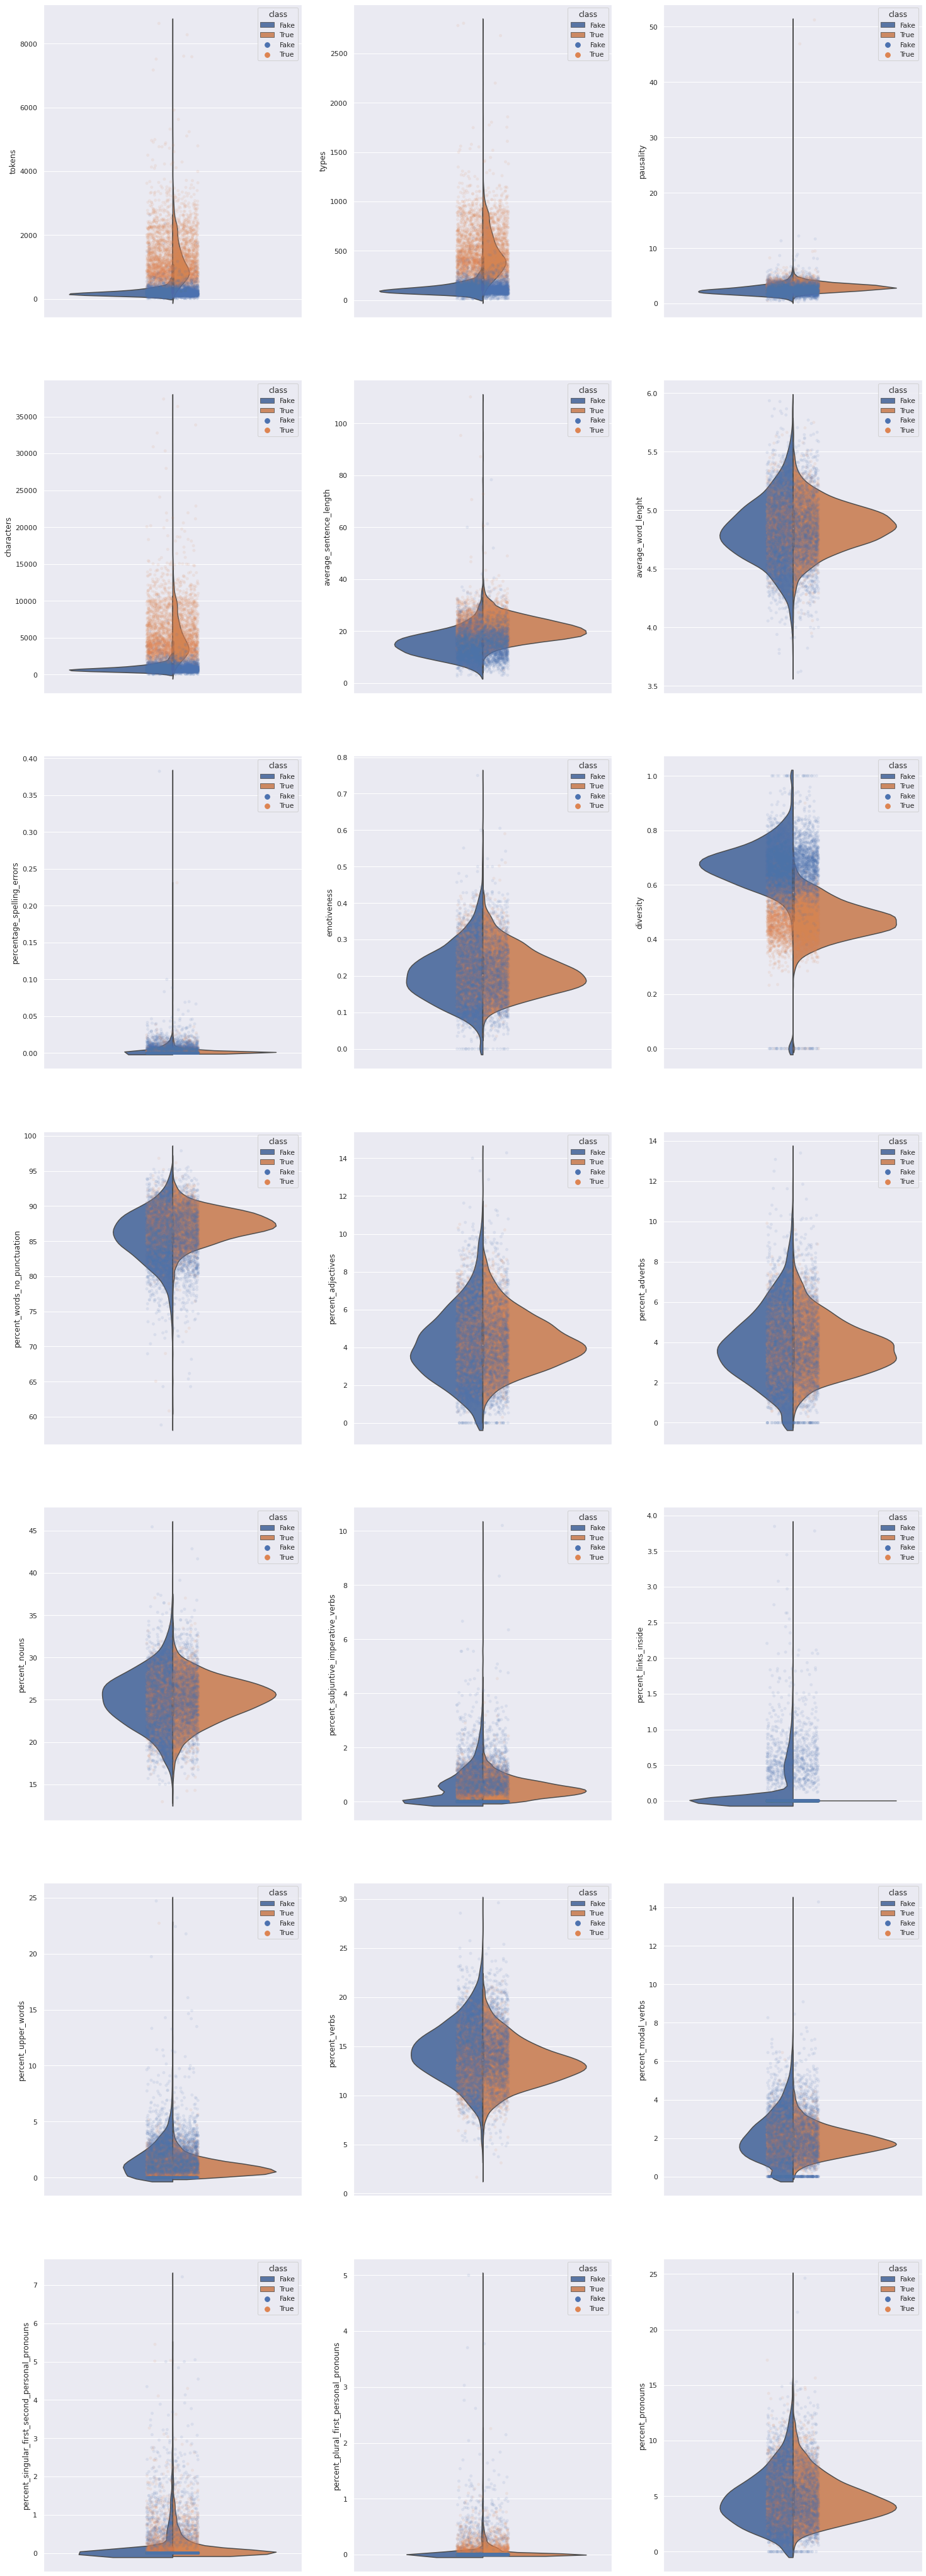

In [122]:
fig, axes = plt.subplots(ncols=3, nrows=7, figsize=(25, 75), sharex=False, sharey=False)
plot_data_df = data_df.copy()
plot_data_df["all"] = ""

for col, ax in zip(CONTINUOUS_VARIABLES, axes.flat):
    sns.violinplot(x="all", data=plot_data_df, y=col, hue='class', cut=True, split=True, ax=ax, vars=data_df.columns)
    sns.stripplot(x="all", data=plot_data_df, y=col, hue='class', alpha=.1, ax=ax)
    ax.set_xlabel("")

plt.show()

## Word Cloud

In [ ]:
import nltk
nltk.download('stopwords')

In [ ]:
list_of_words_fake = ' '.join(list(data_df[data_df["class"] == 'Fake'].text))
list_of_words_fake = [word for word in list_of_words_fake.split(" ") if word not in nltk.corpus.stopwords.words('portuguese')]

In [ ]:
CONTINUOUS_VARIABLES = [x for x, y in data_df.dtypes.iteritems() if str(y) not in ('category', 'object')]
combinations = [(x,y) for x in CONTINUOUS_VARIABLES for y in CONTINUOUS_VARIABLES]
SAVEFIG_FOLDER = REPORTS_PATH / "scatterplots"
SAVEFIG_FOLDER.mkdir(exist_ok=True, parents=True)

for col1, col2 in combinations:
    sns.jointplot(x=col1, y=col2, hue='class', data=data_df)
    plt.savefig(SAVEFIG_FOLDER/f'{col1}-{col2}.png')
    plt.close()

plt.show()

In [ ]:
from wordcloud import WordCloud
SAVEFIG_FOLDER = REPORTS_PATH
wordcloud = WordCloud(max_words=1000, background_color="white").generate(" ".join(list_of_words_fake))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
wordcloud.to_file(SAVEFIG_FOLDER/'wordcloudfake.png')

In [ ]:
list_of_words_true = ' '.join(list(data_df[data_df["class"] == 'True'].text))
list_of_words_true = [word for word in list_of_words_true.split(" ") if word not in nltk.corpus.stopwords.words('portuguese')]

In [ ]:
from wordcloud import WordCloud
SAVEFIG_FOLDER = REPORTS_PATH
wordcloud = WordCloud(max_words=1000, background_color="white").generate(" ".join(list_of_words_true))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
wordcloud.to_file(SAVEFIG_FOLDER/'wordcloudtrue.png')